<center><font size=8, color='green'>Medical claims analysis for cost reduction opportunities

In [2]:
# impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# declaring the data path
claim_path= "./data/claim.csv"
demographics_path= "./data/demography.csv"
demography_claim_path= "./data/demography_claim.csv"

In [4]:
# declare a function to load the data
def load_data(path):
    return pd.read_csv(path)


In [5]:
# load the data
claim= load_data(claim_path)
demography= load_data(demographics_path)
demography_claim= load_data(demography_claim_path)

In [6]:
# check the first 5 rows of the data
display(claim.head())
display(demography_claim.head())
display(demography.head())

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
0,66dc1204-4659-4a11-9caf-8d73e606f2c8,2024-04-23 00:50:53.250608,2024-04-23 00:50:53.276233,MUTUELLE,ab4dbfa7-9d5d-4341-b3b6-29a4c4b2edf1,32138,2023-10-01 14:30:46.964,2024-03-16 22:54:55.463,HEMORRHOIDECTOMY,ICD-J05AB01003,CPT-42242000FQZ445,75,2625,1716,909
1,71bde428-ef0a-4d42-bff1-473b751fb40e,2024-04-23 00:52:19.464756,2024-04-23 00:52:19.479903,MUTUELLE,5e11bb86-bdf5-460e-96f5-ac1ab31f3bd1,J01MA03001,2024-03-25 20:37:47.191,2024-04-12 20:39:00.497,CIPROFLOXACIN 500MG TABLET,ICD-J05AR01002,CPT-42242000FQZ429,73,521585,222971,298614
2,53ed2514-fad6-4925-abd2-605e272277e7,2024-04-23 00:50:53.317807,2024-04-23 00:50:53.348851,MUTUELLE,d1a7c6dc-cab5-4700-92b7-b406fddbdca4,M01AB05005,2023-08-13 22:05:54.853,2023-12-23 02:15:25.413,DICLOFENAC 75MG/ML INJECTION,ICD-J01XX04001,CPT-42242000FQZ419,100,559500,294490,265010
3,ce6f97e0-7179-4f13-bd59-2e91cbd53442,2024-04-23 00:50:53.377835,2024-04-23 00:50:53.406237,MUTUELLE,f095637f-2192-4a71-aa37-2f3cdbdd3790,A03F01001,2024-03-21 11:19:42.498,2024-04-16 09:17:25.318,METOCLOPRAMIDE 10MG TABLET,ICD-J01XC01001,CPT-42242000FQZ386,86,672520,672469,51
4,a3f82d42-a7f8-4421-bf11-35a53b994fde,2024-04-23 00:51:19.294958,2024-04-23 00:51:19.306367,RAMA,2f5014a3-b453-4ecf-adfb-fdd00292b90a,37438,2023-11-27 21:14:51.064,2024-01-28 18:58:20.373,SCROTUM EXCISION,ICD-J04AM05002,CPT-42242000FQZ419,50,303500,54816,248684


,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,Alberta,Gerhold,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291
1,51b5e30c-cf7c-463b-874c-35b935257049,Dorothy,Rice,MALE,Forttown,MUTUELLE,30631,HYDROCELECTOMY,2023-11-10 07:00:17.013,2024-02-20 01:02:53.296,ICD-J04AB02002,CPT-42242000FQZ400,60,590700,528066,62634
2,5819dcde-d9a9-4bba-9ce5-6eb92c0b9194,Brandy,Pollich,FEMALE,Port Birmills,RAMA,35641,OVARIECTOMIE,2023-07-16 00:22:32.556,2024-03-30 05:26:46.263,ICD-J04AM02002,CPT-42242000FQZ351,34,100980,73711,27269
3,026ec986-620b-41e5-9fc2-f9dc4d2247d2,Phyllis,Monahan,FEMALE,North Lusland With Bathdsor,RAMA,35641,OVARIECTOMIE,2023-05-21 00:24:43.016,2023-05-27 06:00:36.737,ICD-J01XB02001,CPT-42242000FQZ410,31,199330,48398,150932
4,17469904-7dd7-466d-9090-eba19a6f31dc,Daisy,Kuhic,FEMALE,Cetersrye,RAMA,35641,OVARIECTOMIE,2023-04-12 22:32:48.769,2023-09-09 15:52:50.782,ICD-J07BC01002,CPT-42242000FQZ359,100,888500,313717,574783


,id,createdAt,updatedAt,firstName,lastName,gender,yearOfBirth,location,facilityName
0,9b2af029-7584-4229-8710-7335806c1440,2024-04-23 0:50:52,2024-04-23 0:50:52,Carolyn,Fritsch,FEMALE,1973,Lake Newell,Forttown
1,7feb5992-93e6-4b12-bf82-098e10f5291d,2024-04-23 0:50:52,2024-04-23 0:50:52,Fred,Heller,FEMALE,1982,Valerieworth,La Stamal
2,12c23628-57ab-414b-a2d0-15ce6f756db2,2024-04-23 0:50:52,2024-04-23 0:50:52,Ella,Rath,FEMALE,1913,Louton,Grand Mountnell
3,3bb1ebe6-583b-4abd-a764-fe765383814d,2024-04-23 0:50:52,2024-04-23 0:50:52,Erik,Jaskolski,FEMALE,1922,Lessiestad,Prince Statenor
4,9f4e6e70-8a2a-48b5-ba7d-b333a3174524,2024-04-23 0:50:52,2024-04-23 0:50:52,Flora,Crona,MALE,1917,Berwyn,Great Ponar


In [7]:
# create a function that checks, shape, info, describe and null values
def check_data(data):
    print("Shape of the data: ", data.shape)
    print("Info of the data: ", data.info())
    print("Describe of the data: ", data.describe())
    print("Null values in the data: ", data.isnull().sum())

In [8]:
# check the data
check_data(claim)

Shape of the data:  (1937436, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937436 entries, 0 to 1937435
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   createdAt       object
 2   updatedAt       object
 3   scheme          object
 4   patientId       object
 5   medicationCode  object
 6   admissionDate   object
 7   dischargeDate   object
 8   medicationName  object
 9   diagnosisCode   object
 10  procedureCode   object
 11  quantity        int64 
 12  billedAmount    int64 
 13  verifiedAmount  int64 
 14  paidAmount      int64 
dtypes: int64(4), object(11)
memory usage: 221.7+ MB
Info of the data:  None
Describe of the data:             quantity  billedAmount  verifiedAmount    paidAmount
count  1.937436e+06  1.937436e+06    1.937436e+06  1.937436e+06
mean   5.052918e+01  2.526184e+05    1.262866e+05  1.263318e+05
std    2.886270e+01  2.213372e+05    1.471834e+05  1.471601e+05
min    1.000000e+00  

In [9]:
# check the data
check_data(demography)

Shape of the data:  (38747, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38747 entries, 0 to 38746
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            38747 non-null  object
 1   createdAt     38747 non-null  object
 2   updatedAt     38747 non-null  object
 3   firstName     38747 non-null  object
 4   lastName      38747 non-null  object
 5   gender        38747 non-null  object
 6   yearOfBirth   38747 non-null  int64 
 7   location      38747 non-null  object
 8   facilityName  38747 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.7+ MB
Info of the data:  None
Describe of the data:          yearOfBirth
count  38747.000000
mean    1983.783648
std       25.537726
min     1900.000000
25%     1965.000000
50%     1985.000000
75%     2005.000000
max     2024.000000
Null values in the data:  id              0
createdAt       0
updatedAt       0
firstName       0
lastName        0
gender

In [10]:
# check the data
check_data(demography_claim)

Shape of the data:  (1937350, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937350 entries, 0 to 1937349
Data columns (total 16 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   firstName       object
 2   lastName        object
 3   gender          object
 4   facilityName    object
 5   scheme          object
 6   medicationCode  object
 7   medicationName  object
 8   admissionDate   object
 9   dischargeDate   object
 10  diagnosisCode   object
 11  procedureCode   object
 12  quantity        int64 
 13  billedAmount    int64 
 14  verifiedAmount  int64 
 15  paidAmount      int64 
dtypes: int64(4), object(12)
memory usage: 236.5+ MB
Info of the data:  None
Describe of the data:             quantity  billedAmount  verifiedAmount    paidAmount
count  1.937350e+06  1.937350e+06    1.937350e+06  1.937350e+06
mean   5.052909e+01  2.526185e+05    1.262866e+05  1.263319e+05
std    2.886272e+01  2.213384e+05    1.471842e+05  1.4716

In [11]:
# drop the null values
claim= claim.dropna()

In [12]:
# assert that claim and demography_claim are the same by using their length and the number of unique values
assert len(claim)== len(demography_claim), "The length of the data is not the same"
assert demography_claim['scheme'].value_counts()[0] == claim['scheme'].value_counts()[0], "The number of claims per scheme is not the same"
assert demography_claim['scheme'].value_counts()[1] == claim['scheme'].value_counts()[1], "The number of claims per scheme is not the same"
assert claim['billedAmount'].sum() == demography_claim['billedAmount'].sum(), "The billed amount is not the same"
assert claim['verifiedAmount'].sum() == demography_claim['verifiedAmount'].sum(), "The verified amount is not the same"
assert claim['paidAmount'].sum() == demography_claim['paidAmount'].sum(), "The paid amount is not the same"

<font size=4.5>From the above assertions, we can see that the claim and demography_claim are the same. Hence, from this point, we will be using the claim_demography data for our analysis

## Data preprocessing

In [13]:
# Combine Firstname and Lastname to create a new column called Name
demography['Name']= demography['firstName']+ " "+ demography['lastName']
demography_claim['Name']= demography_claim['firstName']+ " "+ demography_claim['lastName']

#delete the firstname and lastname columns
demography= demography.drop(['firstName', 'lastName'], axis=1)
demography_claim= demography_claim.drop(['firstName', 'lastName'], axis=1)

In [14]:
# check if the number of unique names in demography and demography_claim are the same
assert demography['Name'].nunique() == demography_claim['Name'].nunique(), "The number of unique names is not the same"

# Pick any name in demography check its gender and assert that the same name in demography claim has the same gender
for i in random.sample(range(1, 200), 10):
    name = demography['Name'].iloc[4]
    gender_demography = demography[demography['Name'] == name]['gender'].values[0]
    gender_demography_claim = demography_claim[demography_claim['Name'] == name]['gender'].values[0]
    assert gender_demography == gender_demography_claim, f"Gender mismatch for {name}"

<font size=4> The above assertion shows that the number of unique names in demography and demography_claim are the same. This means that the names in the two dataframes are the same. Therefore we can merge the two dataframe based on Name </font>

In [15]:
# Create a mapping for 'yearOfBirth' and 'location' based on 'name'
yearOfBirth_map = demography.set_index('Name')['yearOfBirth'].to_dict()
location_map = demography.set_index('Name')['location'].to_dict()

# Use the map function to add 'yearOfBirth' and 'location' to 'demography_claim'
demography_claim['yearOfBirth'] = demography_claim['Name'].map(yearOfBirth_map)
demography_claim['location'] = demography_claim['Name'].map(location_map)


In [16]:
# create a feature called age by taking 2024-yearOfbirth
demography_claim['age']= 2024 - demography_claim['yearOfBirth']

# delete the yearofBirth column
demography_claim= demography_claim.drop(['yearOfBirth'], axis=1)

In [17]:
demography_claim.head(5)

,id,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,Name,location,age
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291,Alberta Gerhold,West Gianni,74
1,51b5e30c-cf7c-463b-874c-35b935257049,MALE,Forttown,MUTUELLE,30631,HYDROCELECTOMY,2023-11-10 07:00:17.013,2024-02-20 01:02:53.296,ICD-J04AB02002,CPT-42242000FQZ400,60,590700,528066,62634,Dorothy Rice,North Little Rock,70
2,5819dcde-d9a9-4bba-9ce5-6eb92c0b9194,FEMALE,Port Birmills,RAMA,35641,OVARIECTOMIE,2023-07-16 00:22:32.556,2024-03-30 05:26:46.263,ICD-J04AM02002,CPT-42242000FQZ351,34,100980,73711,27269,Brandy Pollich,Vickiefort,76
3,026ec986-620b-41e5-9fc2-f9dc4d2247d2,FEMALE,North Lusland With Bathdsor,RAMA,35641,OVARIECTOMIE,2023-05-21 00:24:43.016,2023-05-27 06:00:36.737,ICD-J01XB02001,CPT-42242000FQZ410,31,199330,48398,150932,Phyllis Monahan,East Thadstad,42
4,17469904-7dd7-466d-9090-eba19a6f31dc,FEMALE,Cetersrye,RAMA,35641,OVARIECTOMIE,2023-04-12 22:32:48.769,2023-09-09 15:52:50.782,ICD-J07BC01002,CPT-42242000FQZ359,100,888500,313717,574783,Daisy Kuhic,Effertzboro,68


# Exploratory Data Analysis

In [18]:
# change demography_claim to df
df= demography_claim
df.shape

(1937350, 17)

## Univariate Analysis

In [19]:
# create a function that checks number of unique values in each column and the data type of that column
def unique_values(data):
    for column in data.columns:
        print(f'{column} has {data[column].nunique()} unique values, its data type is {data[column].dtype}')

# check the unique values
unique_values(df)

id has 38747 unique values, its data type is object
gender has 2 unique values, its data type is object
facilityName has 100 unique values, its data type is object
scheme has 2 unique values, its data type is object
medicationCode has 100 unique values, its data type is object
medicationName has 100 unique values, its data type is object
admissionDate has 1936928 unique values, its data type is object
dischargeDate has 1937240 unique values, its data type is object
diagnosisCode has 98 unique values, its data type is object
procedureCode has 100 unique values, its data type is object
quantity has 100 unique values, its data type is int64
billedAmount has 78719 unique values, its data type is int64
verifiedAmount has 451612 unique values, its data type is int64
paidAmount has 452092 unique values, its data type is int64
Name has 37283 unique values, its data type is object
location has 27173 unique values, its data type is object
age has 125 unique values, its data type is int64


In [20]:
# function to plot the distribution of a variable
def plot_distribution(data, feature, Kde=False):
    """
    Plot the distribution of a given feature in the provided data.

    Parameters:
    data (pandas.DataFrame): The data containing the feature.
    feature (str): The name of the feature to plot.

    Returns:
    None
    """
    plt.figure(figsize=(8,5))
    plt.title("Distribution of %s" % feature)
    sns.histplot(data[feature].dropna(), kde=Kde, bins=30)
    plt.show()

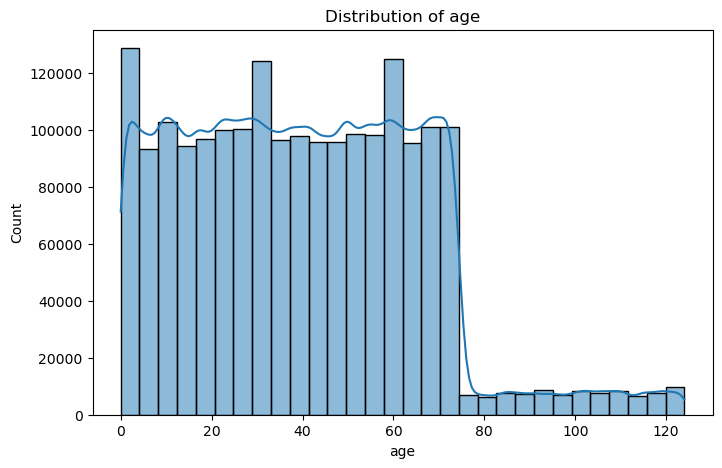

In [21]:
# plot the distribution of the age
plot_distribution(df, 'age',Kde=True)

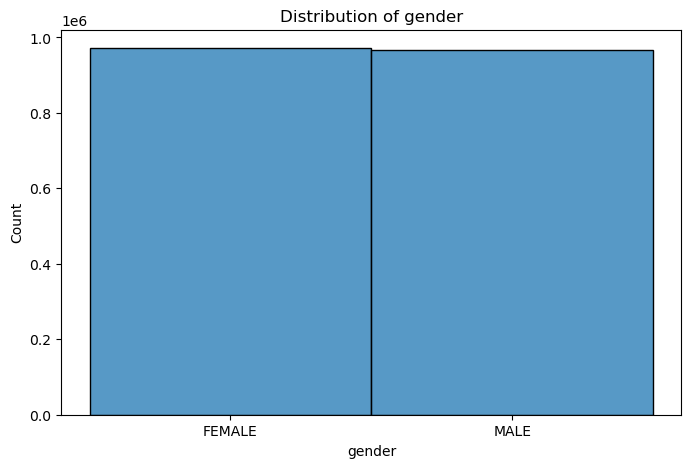

In [22]:
# plot the distribution of gender
plot_distribution(df,'gender')

<font size ="4">The claims of males and felames are almost the equal

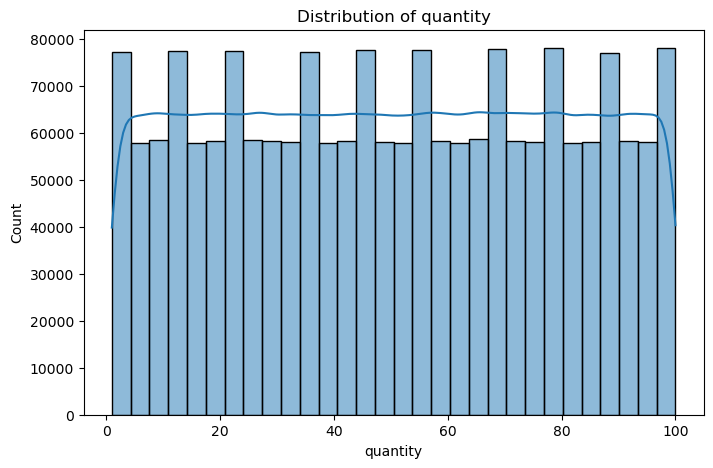

In [23]:
# plot the distribution of quantity
plot_distribution(df,'quantity',Kde=True)

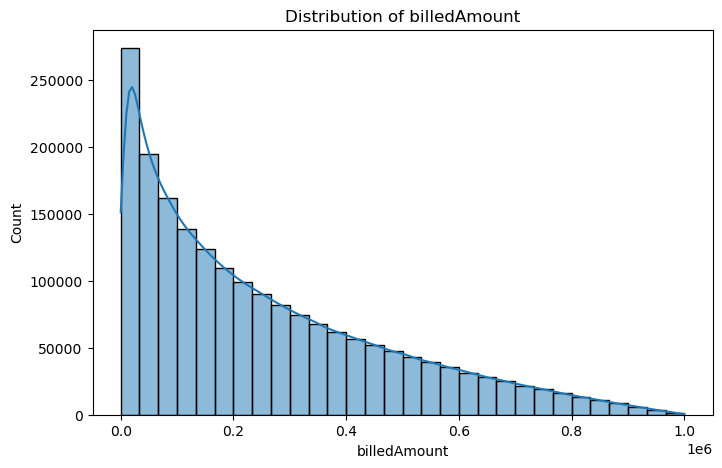

In [24]:
# plot the distribution of billed Amount
plot_distribution(df,'billedAmount',Kde=True)

<font size="4"> The billed amount feature has an exponantial distribution </font>

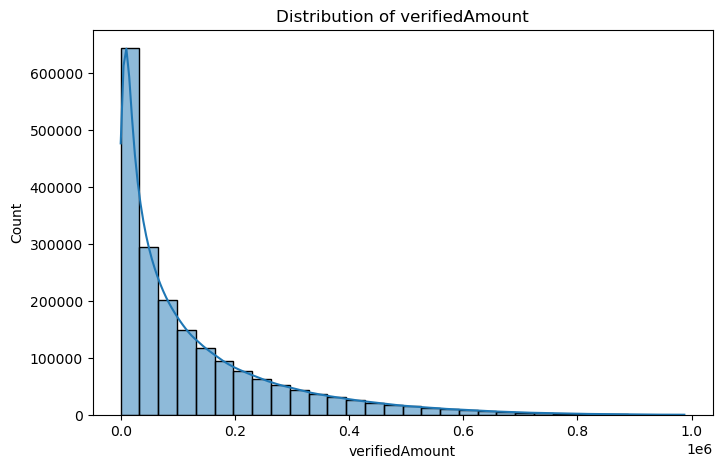

In [25]:
# plot the distribution of verified Amount
plot_distribution(df,'verifiedAmount',Kde=True)

<font size="4"> The Verified amount feature has an exponantial distribution </font>

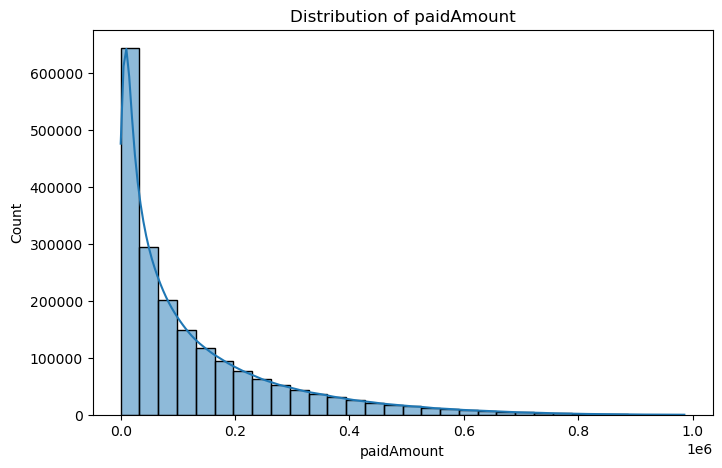

In [26]:
# plot the distribution of paid Amount
plot_distribution(df,'paidAmount',Kde=True)

<font size="4"> The Paid amount feature has an exponantial distribution </font>

In [27]:
# create a new feature called rate
df['rate']=(df['paidAmount']/df['billedAmount'])*100

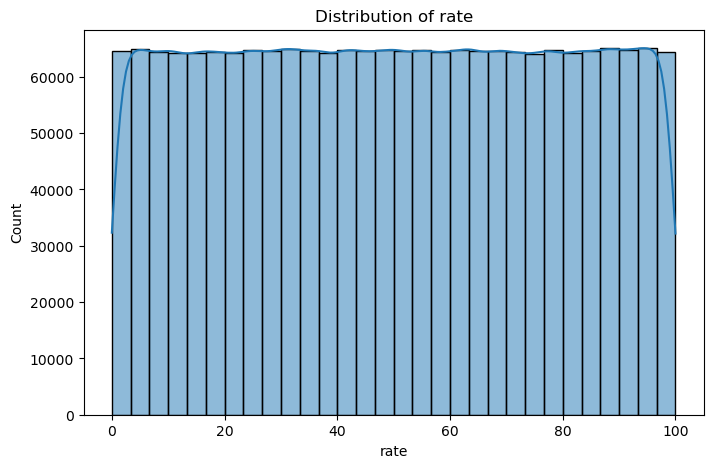

In [28]:
# plot the distribution of rate
plot_distribution(df,'rate',Kde=True)

<font size="4"> The rate feature has an exponantial distribution </font>

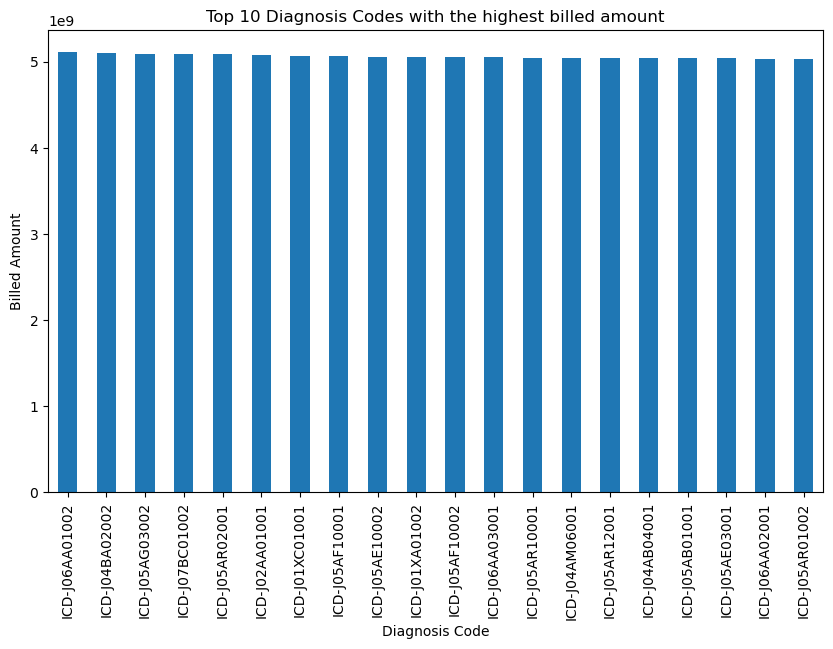

In [30]:
# Find top 10 diagnosis codes with the highest billed amount
top_10_diagnosis= df.groupby('diagnosisCode')['billedAmount'].sum().sort_values(ascending=False).head(20)

# plot the top 10 diagnosis codes with the highest billed amount
plt.figure(figsize=(10,6))
top_10_diagnosis.plot(kind='bar')
plt.title("Top 10 Diagnosis Codes with the highest billed amount")
plt.xlabel("Diagnosis Code")
plt.ylabel("Billed Amount")
plt.show()

Text(0, 0.5, 'Billed Amount')

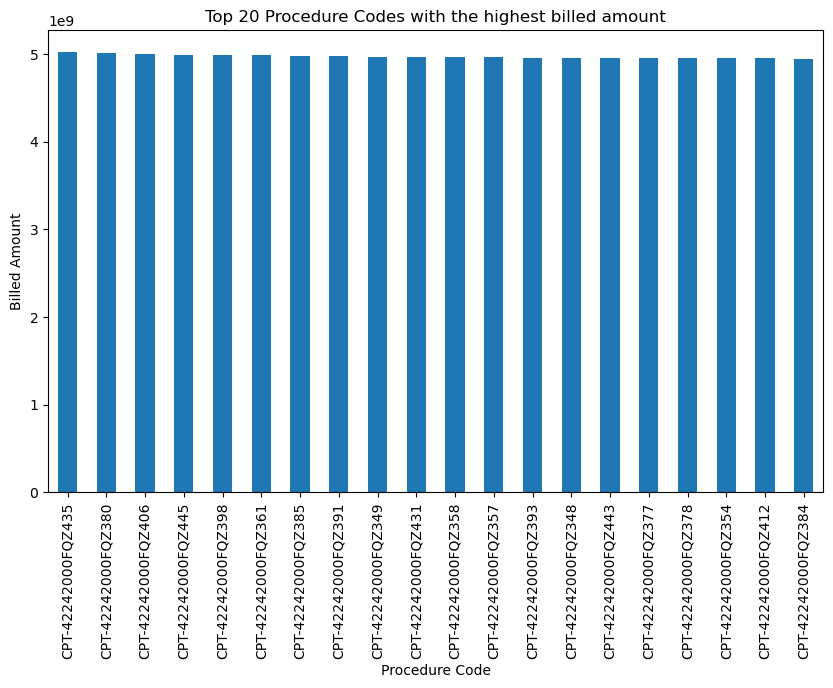

In [31]:
# find top 20 procedure codes with the highest billed amount
top_20_procedure= df.groupby('procedureCode')['billedAmount'].sum().sort_values(ascending=False).head(20)

# plot the top 20 procedure codes with the highest billed amount
plt.figure(figsize=(10,6))
top_20_procedure.plot(kind='bar')
plt.title("Top 20 Procedure Codes with the highest billed amount")
plt.xlabel("Procedure Code")
plt.ylabel("Billed Amount")


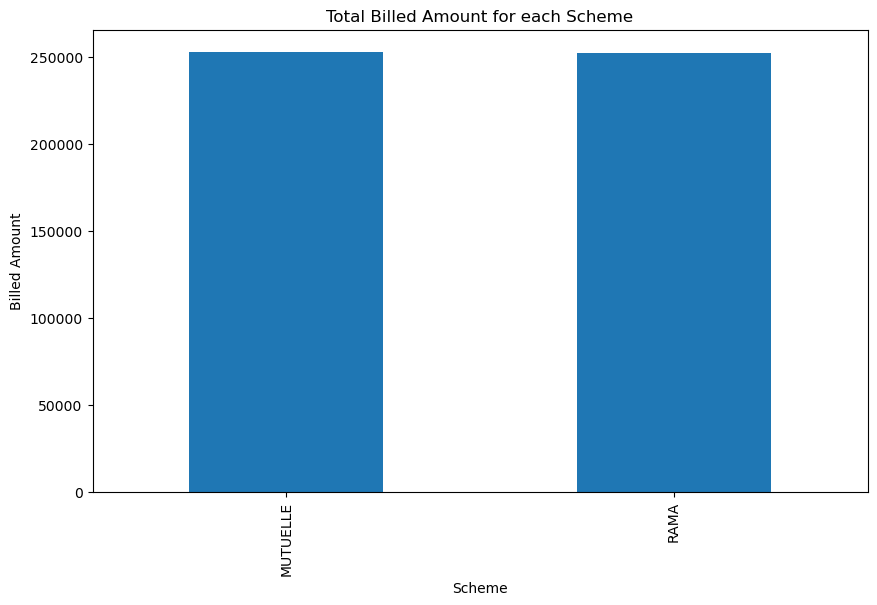

In [33]:
# Find the total billed amount for each scheme
scheme_billed_amount= df.groupby('scheme')['billedAmount'].mean()

# plot the total billed amount for each scheme
plt.figure(figsize=(10,6))
scheme_billed_amount.plot(kind='bar')
plt.title("Total Billed Amount for each Scheme")
plt.xlabel("Scheme")
plt.ylabel("Billed Amount")
plt.show()

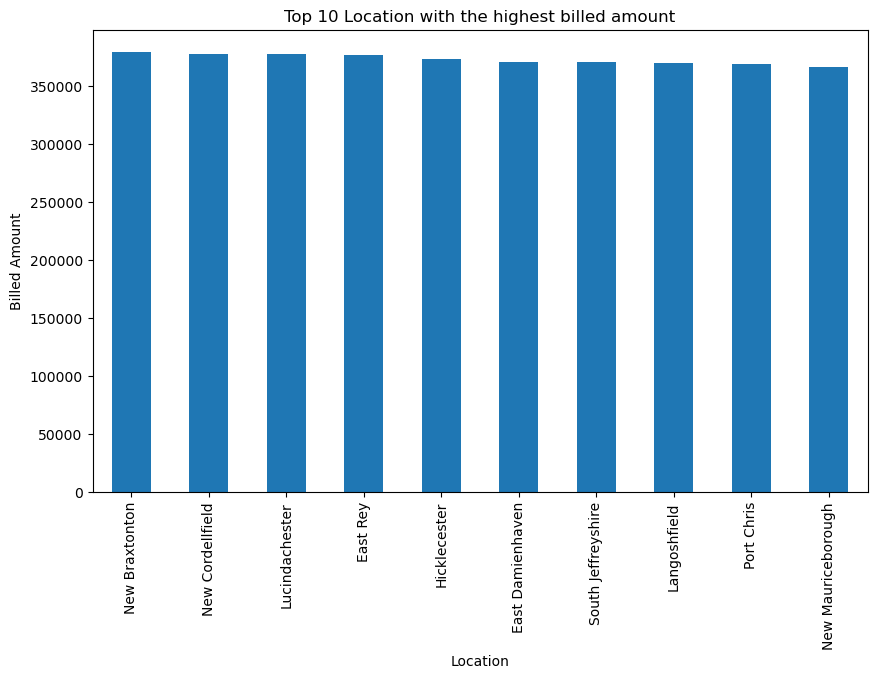

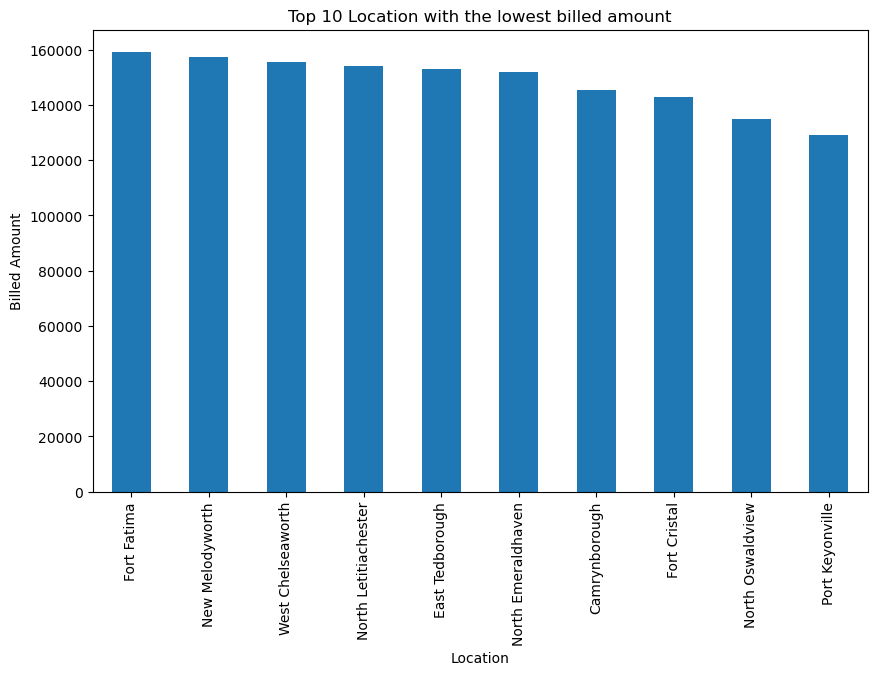

In [38]:
# Find the total billed amount for each location
location_billed_amount= df.groupby('location')['billedAmount'].mean()

# sort the location billed amount in descending order
location_billed_amount= location_billed_amount.sort_values(ascending=False)

# plot the top 10 location with the highest billed amount
plt.figure(figsize=(10,6))
location_billed_amount.head(10).plot(kind='bar')
plt.title("Top 10 Location with the highest billed amount")
plt.xlabel("Location")
plt.ylabel("Billed Amount")
plt.show()

# Plot the last 10 location with the lowest billed amount
plt.figure(figsize=(10,6))
location_billed_amount.tail(10).plot(kind='bar')
plt.title("Top 10 Location with the lowest billed amount")
plt.xlabel("Location")
plt.ylabel("Billed Amount")
plt.show()